<a href="https://colab.research.google.com/github/Lorenzoam03/GDSC_Intro_to_Machine_Learning/blob/main/Tesla's_stock_price_prediction_(sklearn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

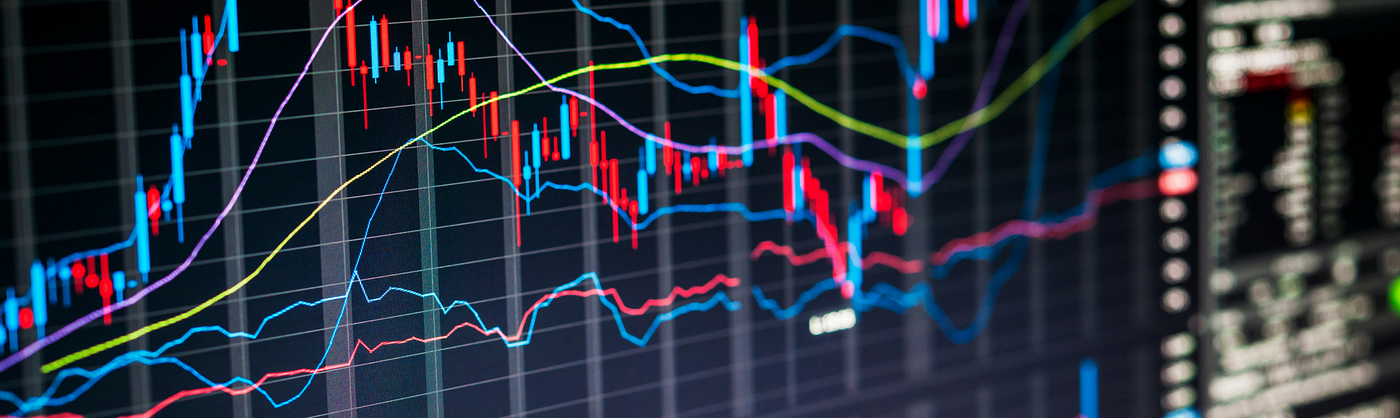

#Tesla's stock price prediction using linear regression

###Import Import Import!

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Personal/GDSC/Intro to ML/

/content/drive/MyDrive/Personal/GDSC/Intro to ML


###All about Data!

#####Download dataset from: https://www.kaggle.com/datasets/timoboz/tesla-stock-data-from-2010-to-2020/

In [5]:
data = pd.read_csv("TSLA.csv")

#####What even is the data?!

In [6]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


#####Plot time series, how is it even a stocks thing without it!

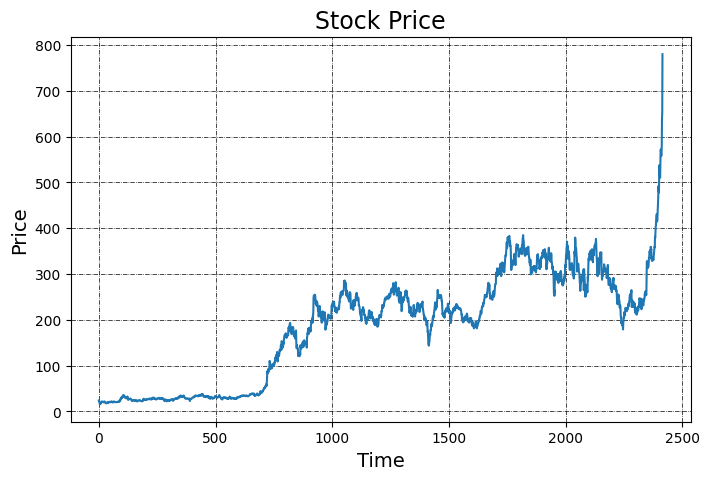

In [9]:
data['Close'].plot(figsize=(8, 5))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

#####Hold on, Hold on... what would my input and output be?

In [10]:
X = data[['High','Low','Open','Volume']].values
y = data['Close'].values

In [11]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# print x_train
print("Type of x_train:",type(X_train))
print("First five elements of x_train are:\n", X_train[:5])
# print y_train
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [[2.71179993e+02 2.66149994e+02 2.66250000e+02 7.82020000e+06]
 [1.98490005e+02 1.93449997e+02 1.97059998e+02 3.58940000e+06]
 [3.08500000e+01 2.96500000e+01 3.00000000e+01 1.47100000e+06]
 [2.26970001e+02 2.21750000e+02 2.22720001e+02 3.08710000e+06]
 [1.91830002e+02 1.75399994e+02 1.88589996e+02 2.07754000e+07]]
Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [269.200012 196.050003  30.73     223.570007 180.949997]


###Finally some ML model!

In [13]:
# Create the linear regression model
model = LinearRegression()
# Train the linear regression model
model.fit(X_train, y_train)

LinearRegression()

In [14]:
print(model.coef_, model.intercept_)

[ 9.22113589e-01  7.21504771e-01 -6.45021778e-01 -3.53429220e-08] -0.02403821030520703


###Trained it now what?!

In [15]:
# Make predictions on the test set
y_test_predicted = model.predict(X_test)

In [16]:
print("Type of predicted:",type(y_test_predicted))
print("First five elements of predicted are:\n", y_test_predicted[:5])

Type of predicted: <class 'numpy.ndarray'>
First five elements of predicted are:
 [ 31.44206177  24.52988898 278.90510109 330.67352198 262.08142218]


In [17]:
# Make predictions on the trian set
# This would let us know is the model overfited or underfited
y_train_predicted = model.predict(X_train)

In [18]:
print("Type of predicted:",type(y_train_predicted))
print("First five elements of predicted are:\n", y_train_predicted[:5])

Type of predicted: <class 'numpy.ndarray'>
First five elements of predicted are:
 [270.04977168 195.34653824  30.41313968 225.49340873 181.03802798]


###Is it even good?!

In [19]:
import math
print('For train data')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train,y_train_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_train,y_train_predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_train,y_train_predicted)))

print('For test data')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_test_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_test_predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,y_test_predicted)))

For train data
Mean Absolute Error: 1.3707365367272877
Mean Squared Error: 4.0579203292761665
Root Mean Squared Error: 2.0144280402328016
For test data
Mean Absolute Error: 1.3377885628343065
Mean Squared Error: 4.379434894445598
Root Mean Squared Error: 2.0927099403514093


###No fun without graphs!

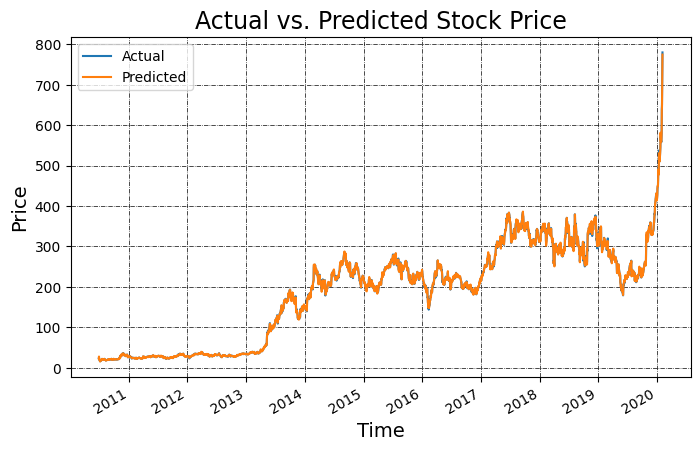

In [20]:
# Why not compare it for the whole dataset
y_pred = model.predict(X)

df_pred = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_pred.flatten()})

# Set the 'Date' column in df_pred from your original data
df_pred['Date'] = data['Date']

# Convert 'Date' to datetime
df_pred['Date'] = pd.to_datetime(df_pred['Date'], format='%Y-%m-%d')

# Create a plot similar to the one you provided
df_pred.set_index('Date')[['Actual', 'Predicted']].plot(figsize=(8, 5))

plt.title("Actual vs. Predicted Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

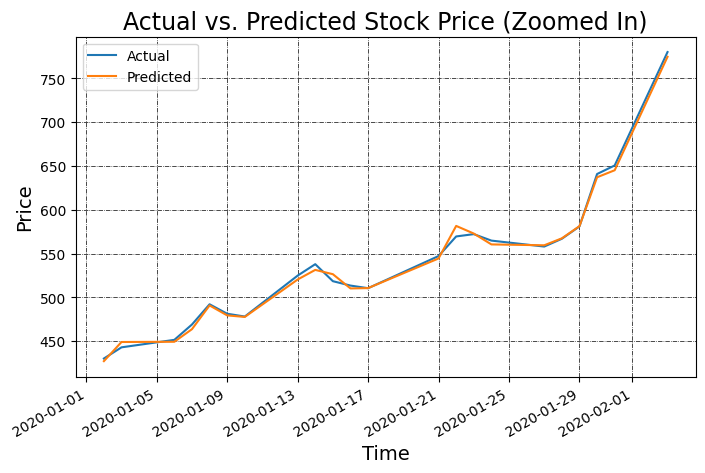

In [21]:
# Define the date range for zooming in (for example, from '2020-01-01' to '2021-01-01')
start_date = '2020-01-01'
end_date = '2021-01-01'

# Create a plot for the zoomed-in period
zoomed_df = df_pred[(df_pred['Date'] >= start_date) & (df_pred['Date'] <= end_date)]

zoomed_df.set_index('Date')[['Actual', 'Predicted']].plot(figsize=(8, 5))

plt.title("Actual vs. Predicted Stock Price (Zoomed In)", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [22]:
# Visualize the predictions
df_pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : y_test_predicted.flatten()})
df_pred.head()

,Actual,Predicted
0,31.490000,31.442062
1,24.650000,24.529889
2,279.760010,278.905101
3,328.200012,330.673522
4,259.320007,262.081422


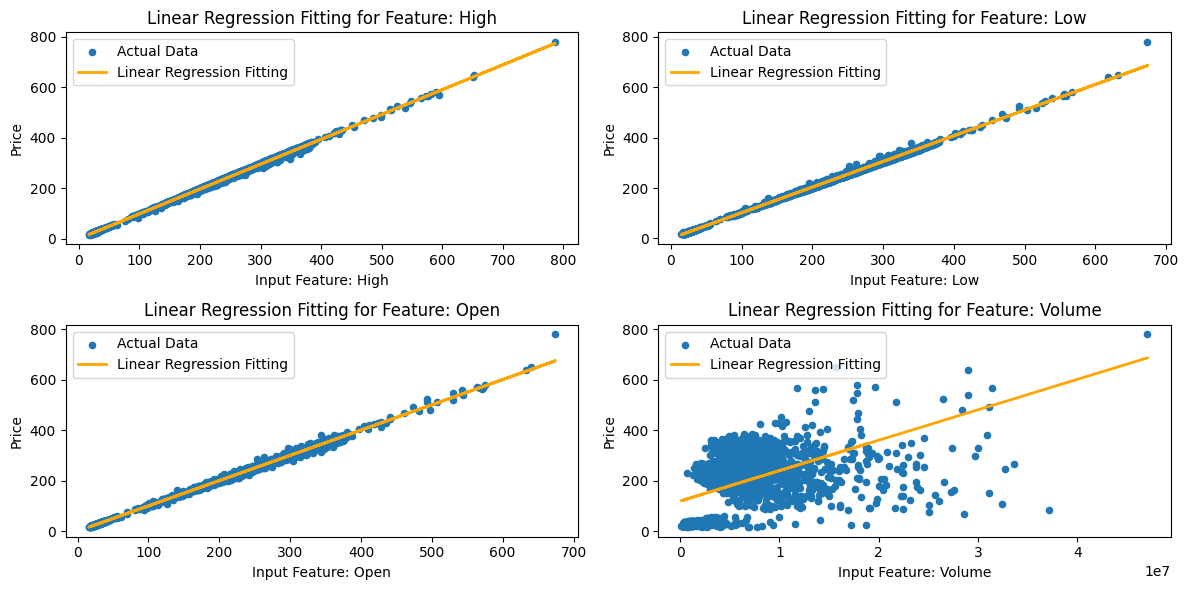

In [23]:
# List of feature names
feature_names = ['High', 'Low', 'Open', 'Volume']

# Create larger plots and reduce font size
plt.figure(figsize=(12, 6))

# Define the size of the dots (you can adjust this value)
dot_size = 20

# Iterate through each feature in X
for feature_index in range(X.shape[1]):
    # Create a new subplot for each feature
    plt.subplot(2, 2, feature_index + 1)

    # Select the feature for the scatter plot
    x_feature = X[:, feature_index]

    # Scatter plot for the actual data points with smaller dots
    plt.scatter(x_feature, y, label='Actual Data', s=dot_size)

    # Fit a linear regression model for the current feature
    model.fit(x_feature.reshape(-1, 1), y)
    y_pred = model.predict(x_feature.reshape(-1, 1))

    # Plot the linear regression fitting line in orange
    plt.plot(x_feature, y_pred, color='orange', linewidth=2, label='Linear Regression Fitting')

    # Set labels and title with reduced font size
    plt.xlabel(f'Input Feature: {feature_names[feature_index]}', fontsize=10)
    plt.ylabel('Price', fontsize=10)
    plt.title(f'Linear Regression Fitting for Feature: {feature_names[feature_index]}', fontsize=12)
    plt.legend(fontsize=10)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


<Axes: >

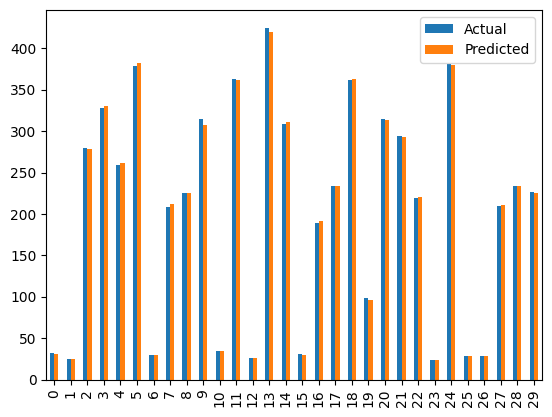

In [24]:
graph=df_pred.head(30)
graph.plot(kind='bar')